In [4]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from IPython.core.display import display, HTML
from datetime import datetime
%cd "C:\Users\curna\Desktop\Data"
df = pd.read_csv("nvidia_stock_prices.csv")

C:\Users\curna\Desktop\Data


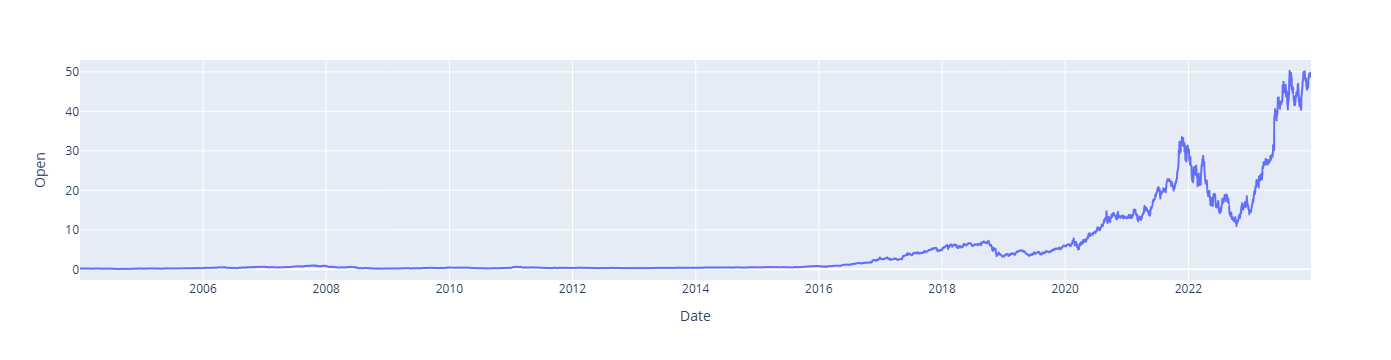

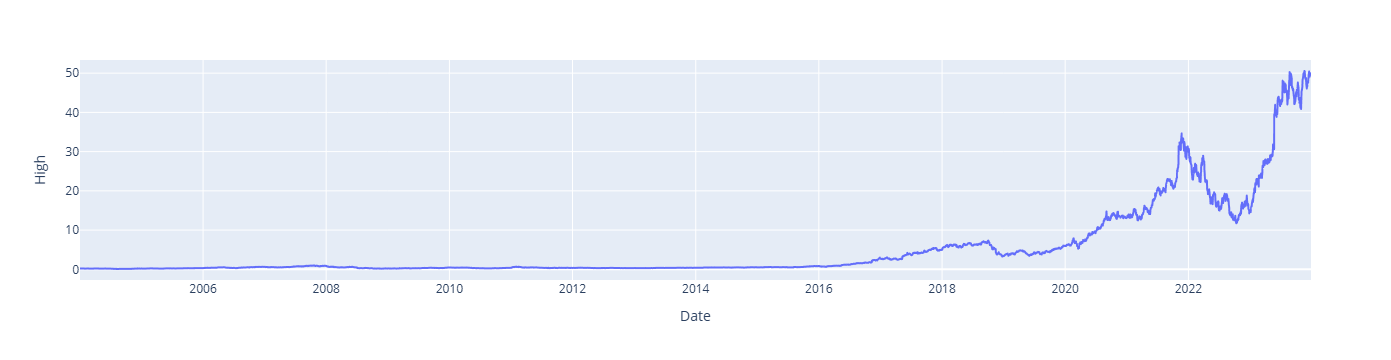

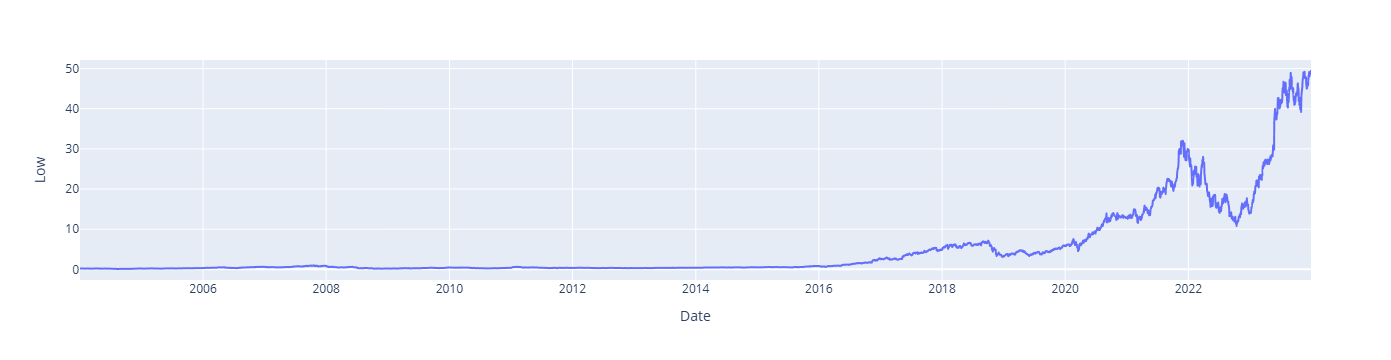

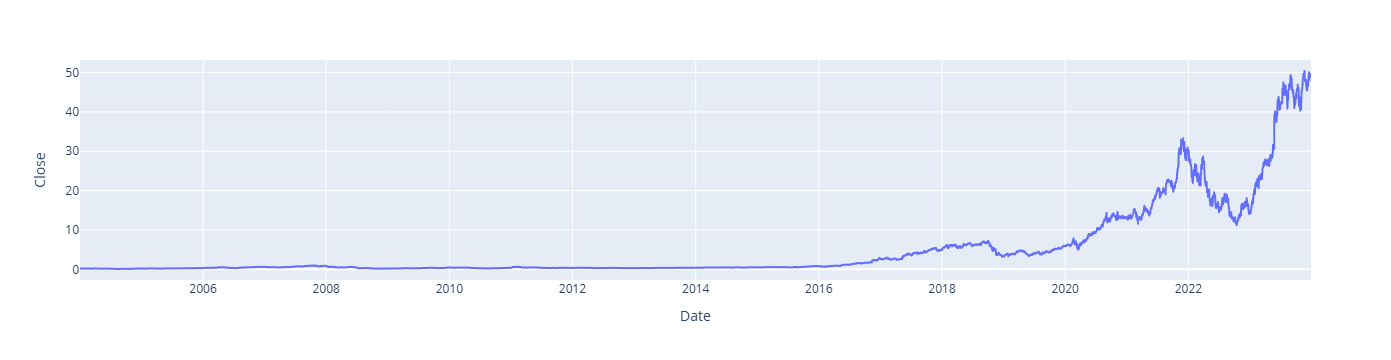

In [5]:
for i in df.columns[1:5]:
    fig = px.line(df, y=i, x=df.columns[0])
    fig.show()

# Average monthly stocks each year

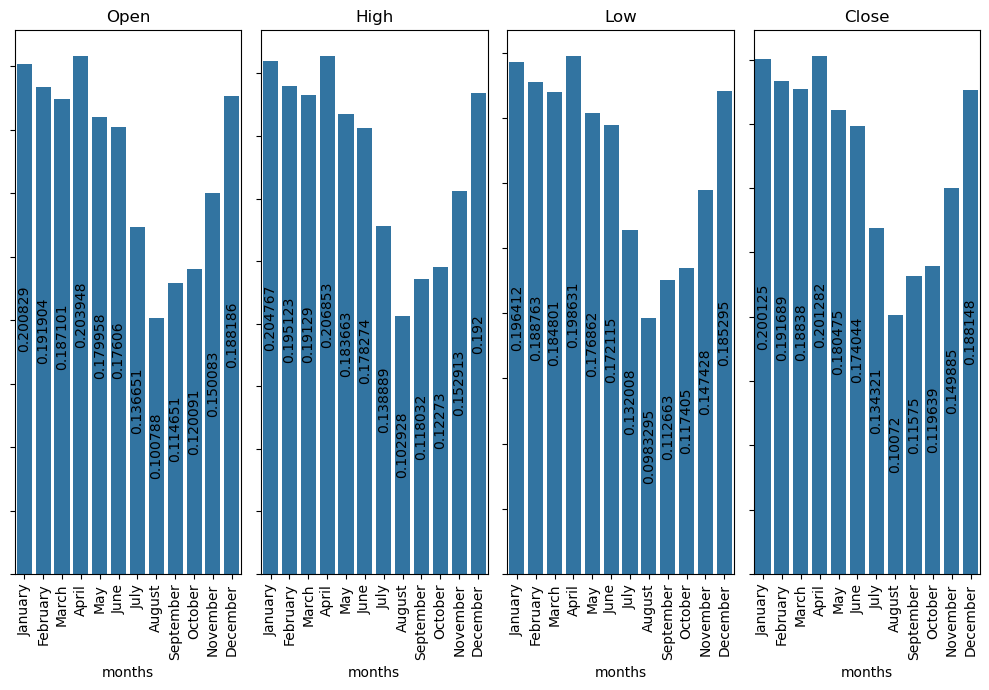

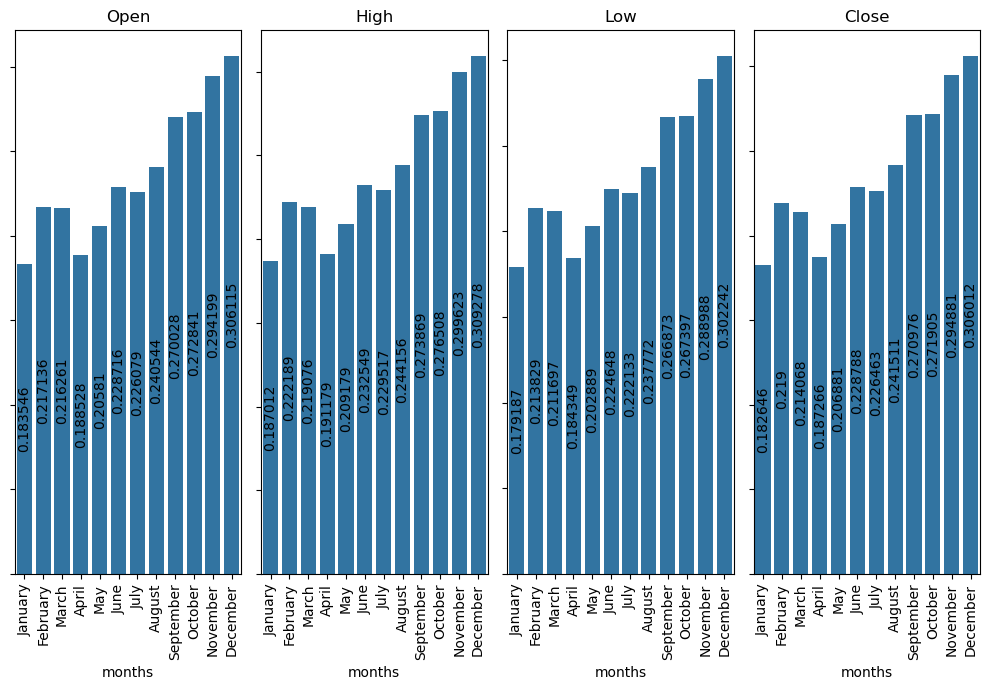

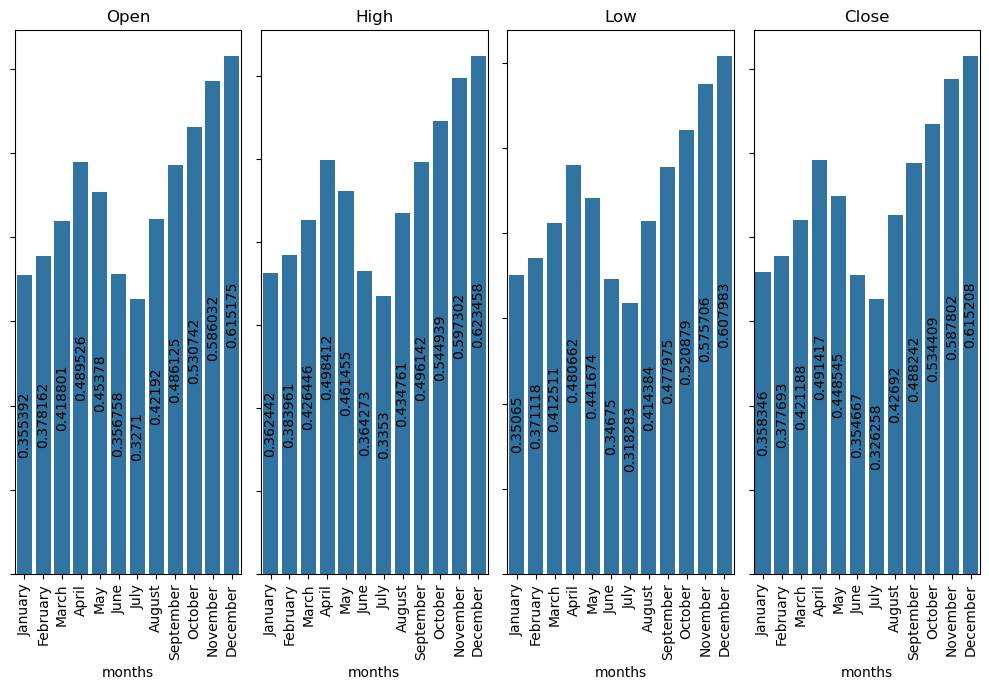

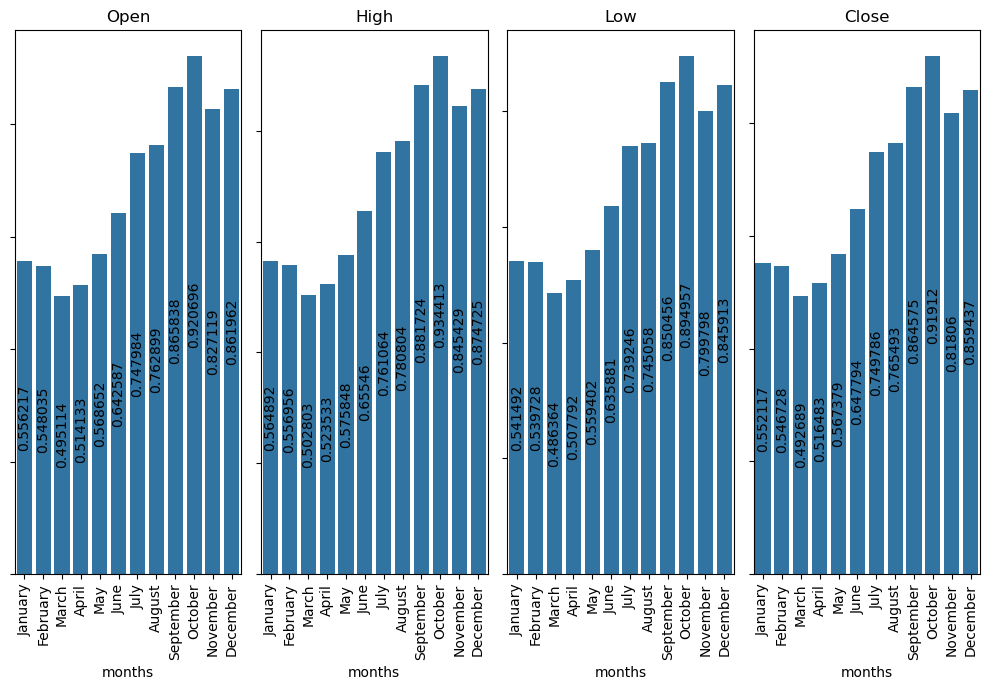

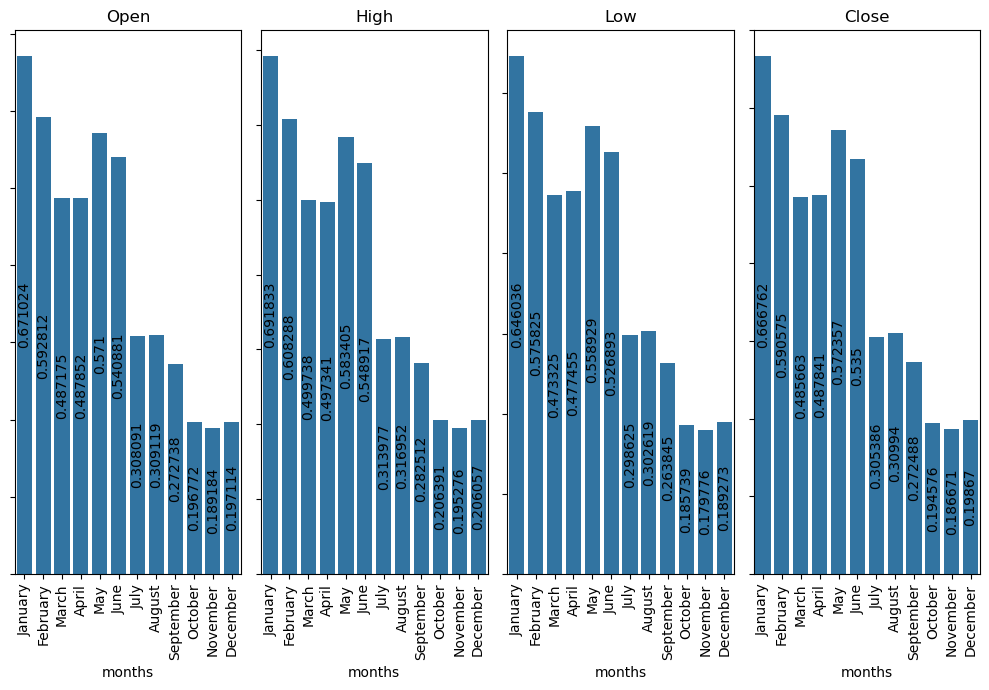

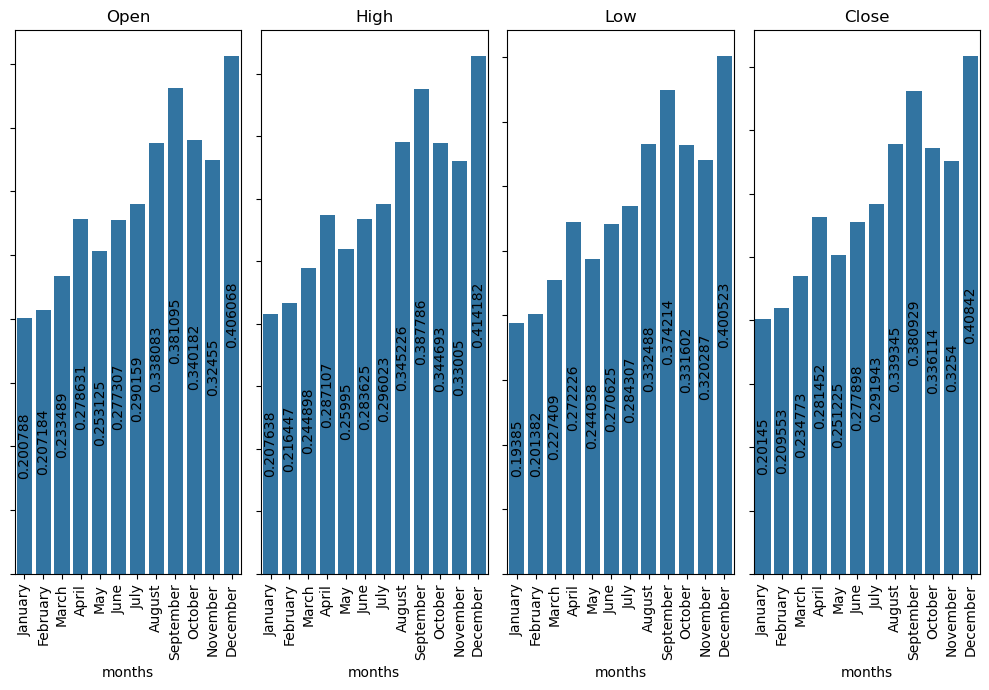

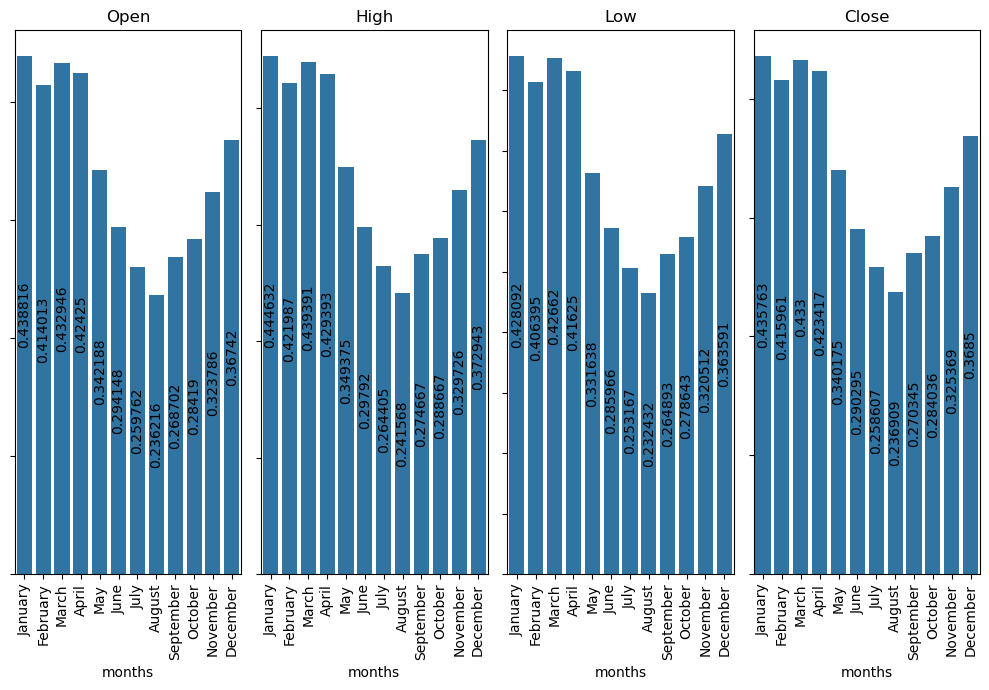

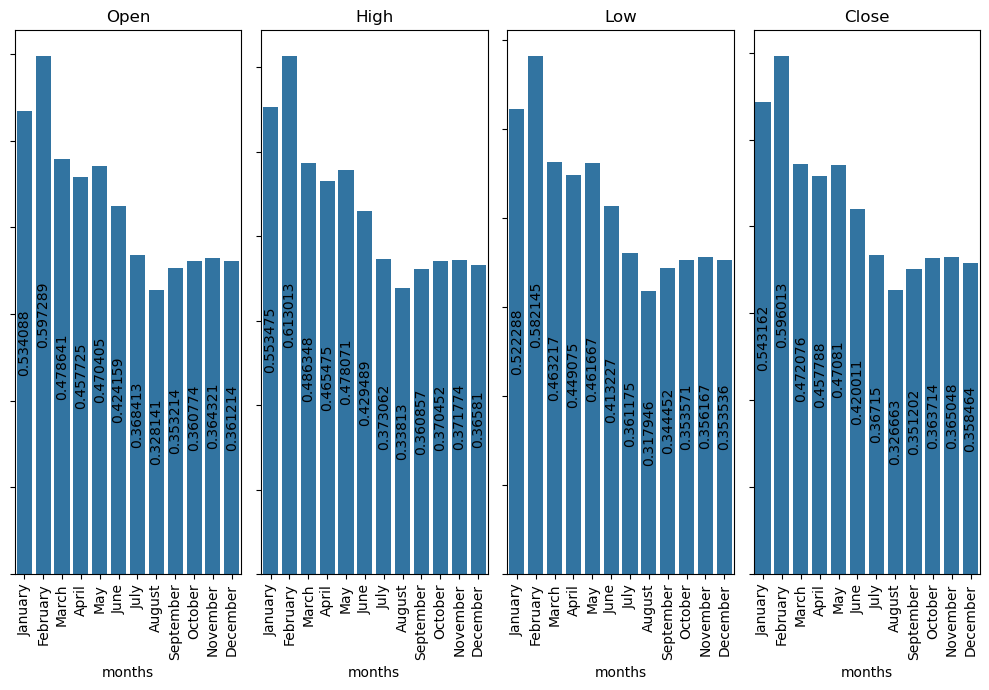

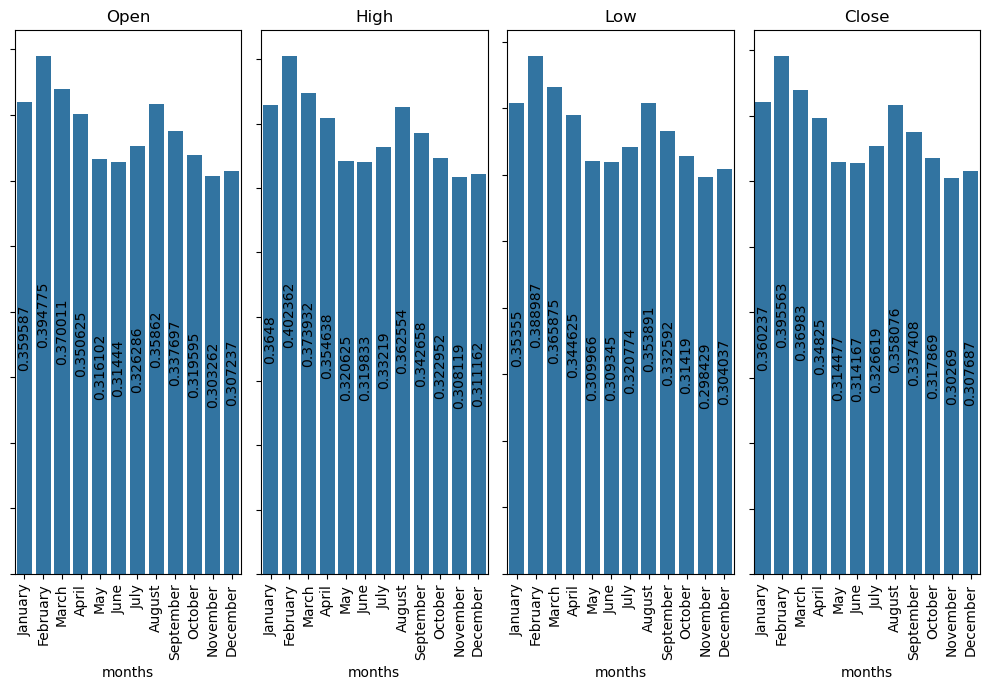

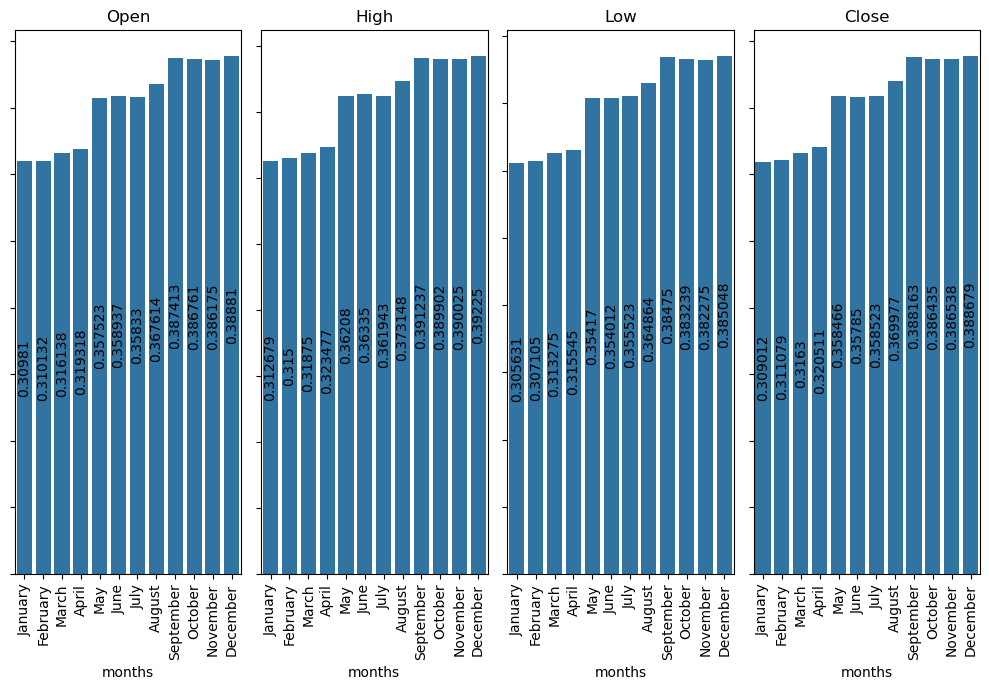

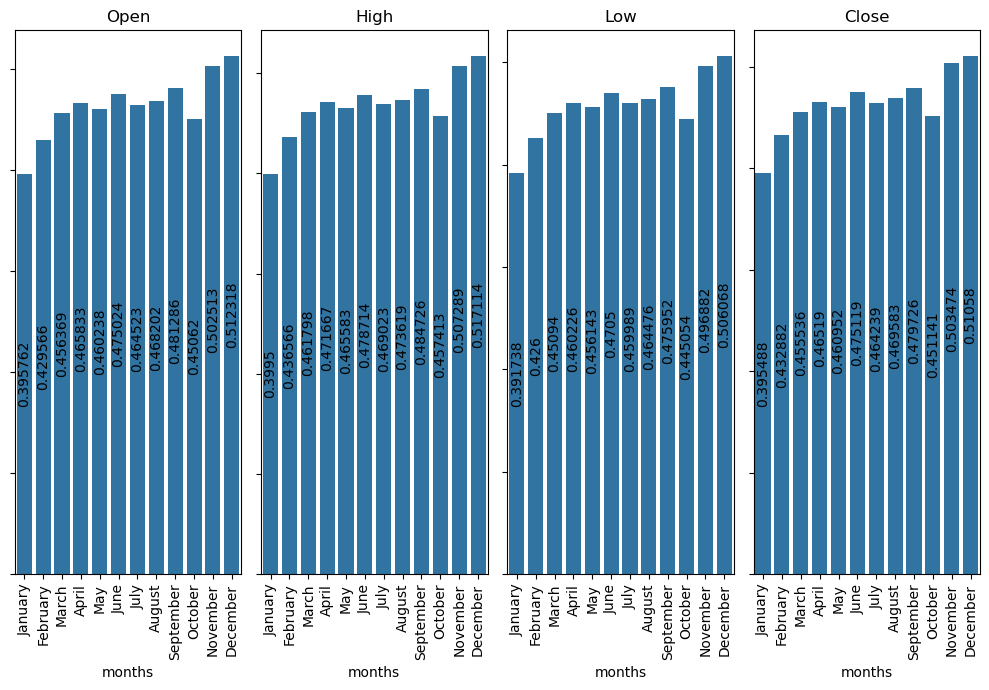

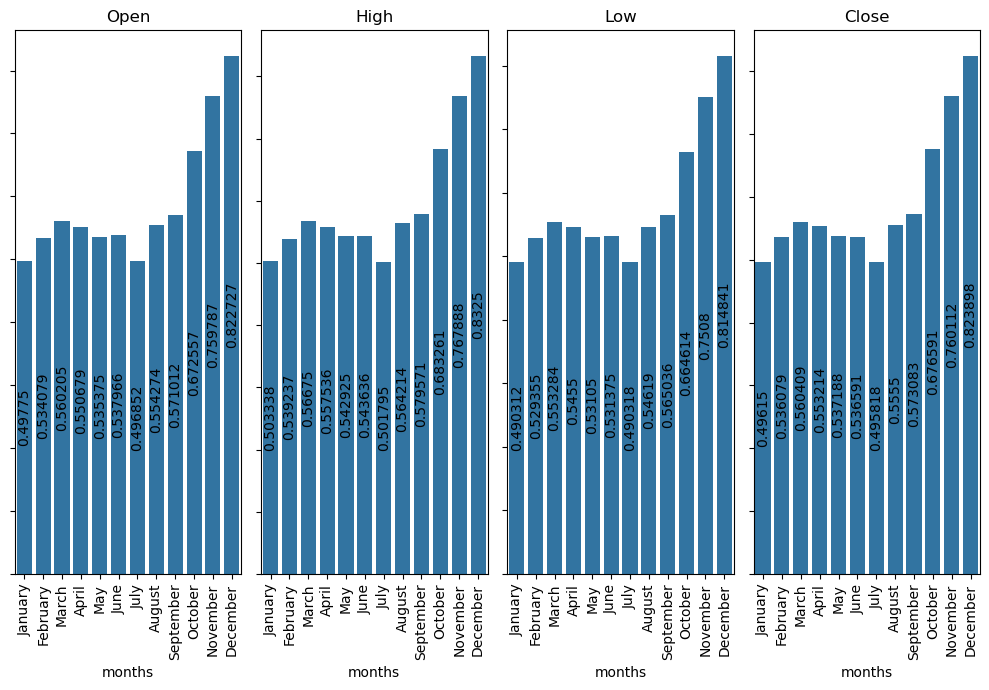

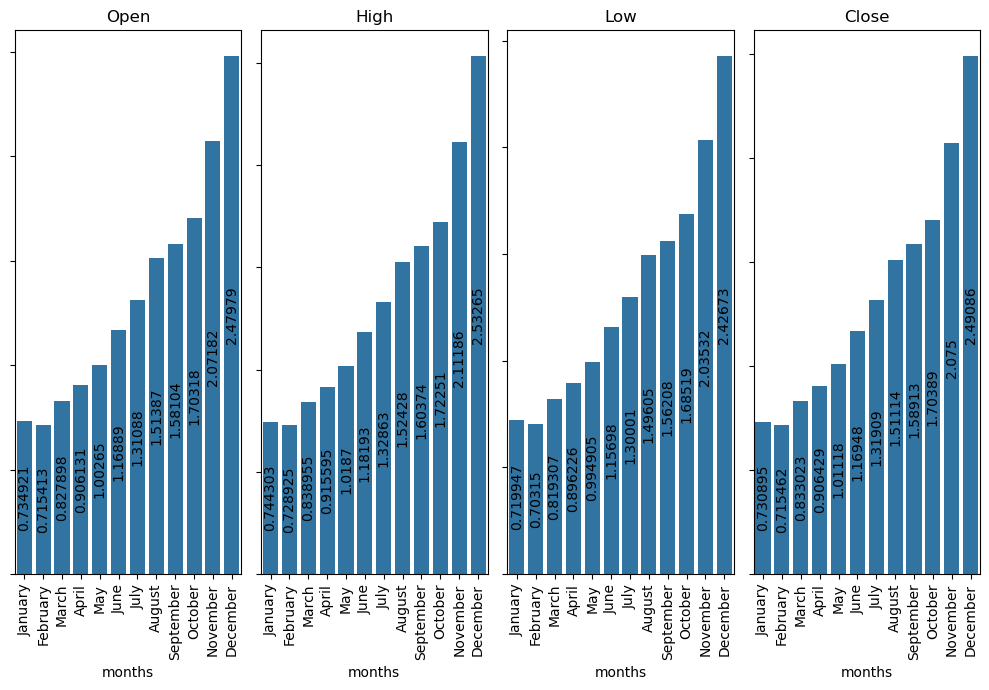

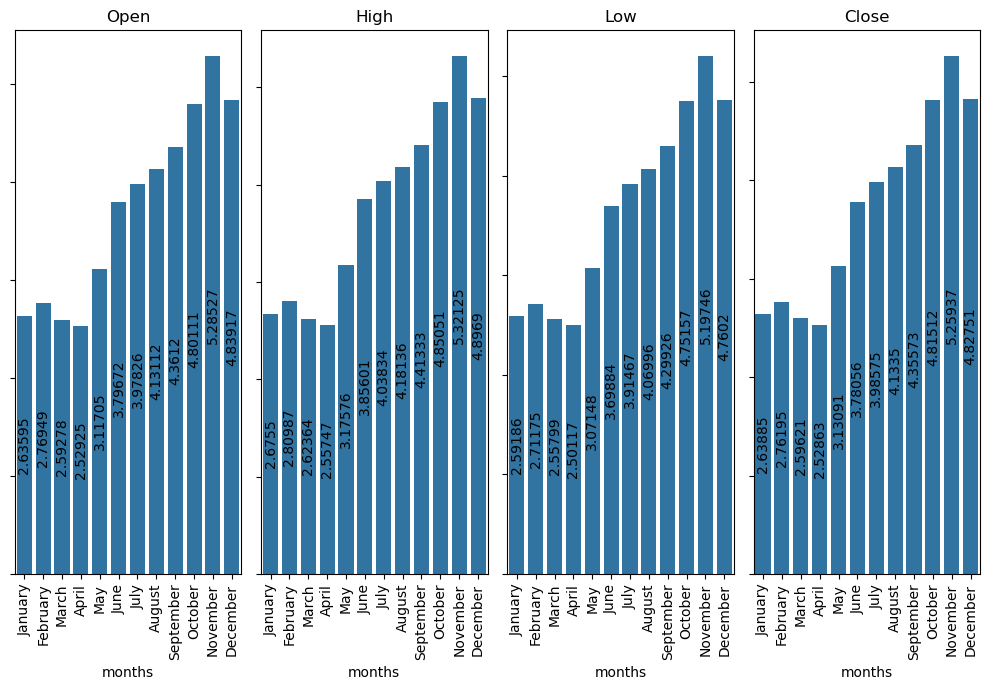

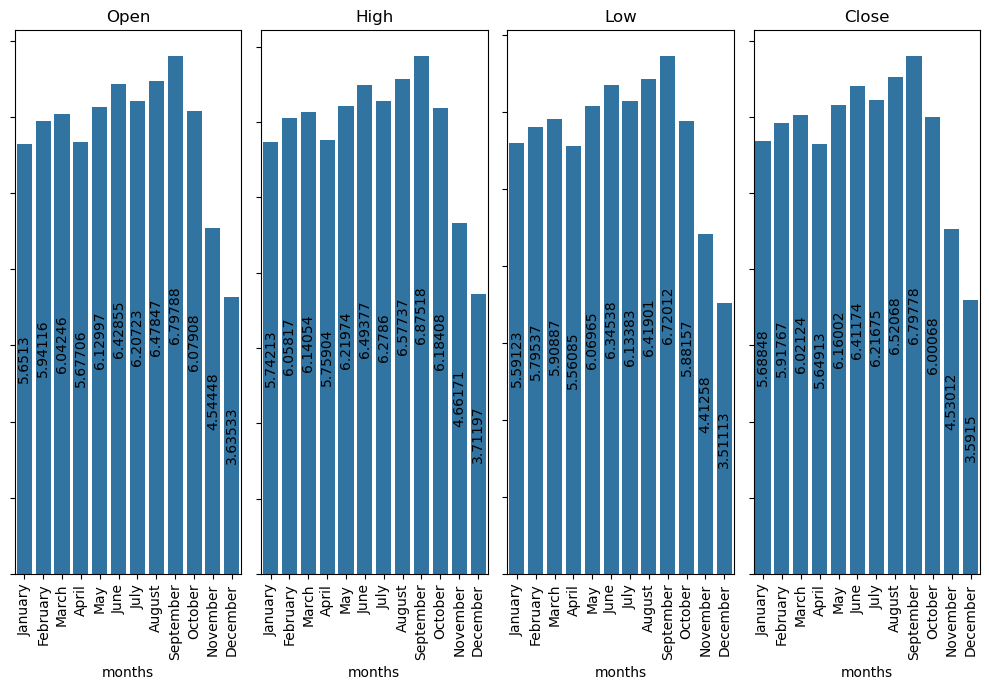

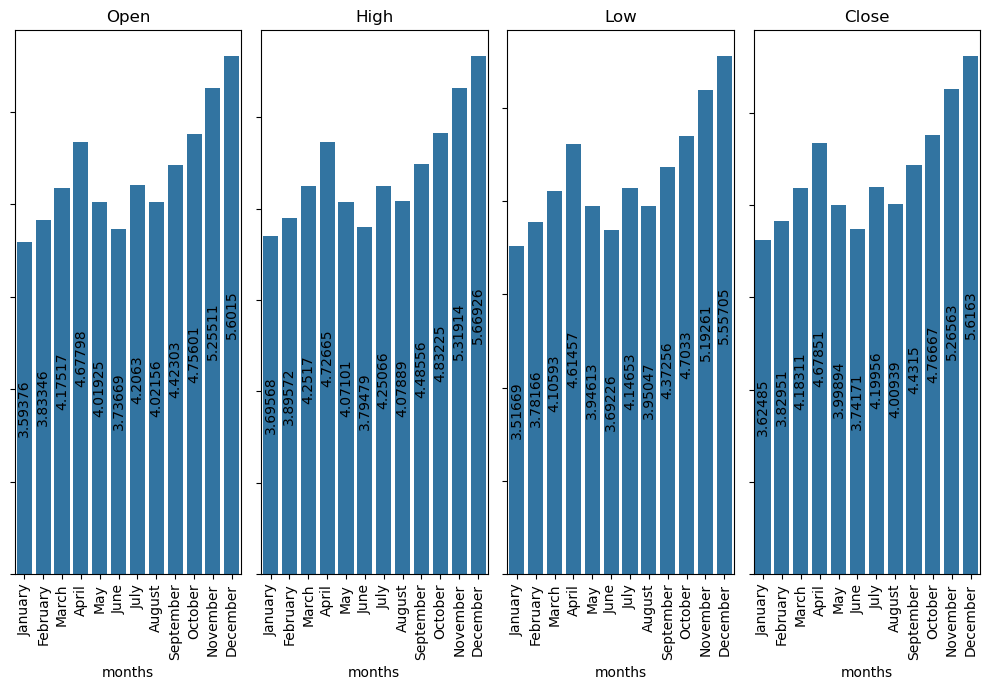

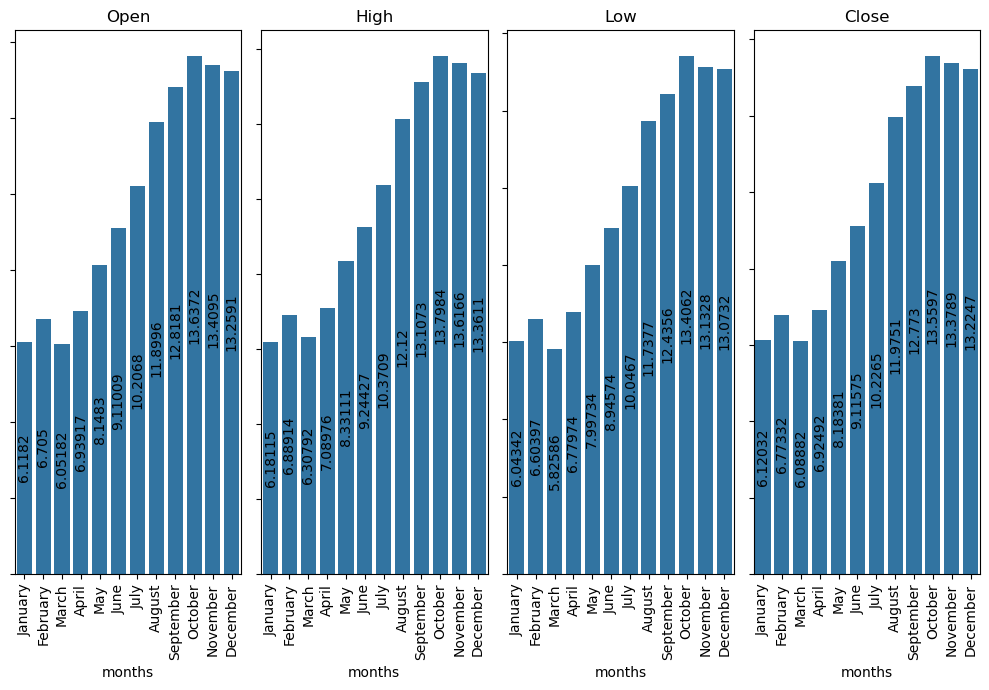

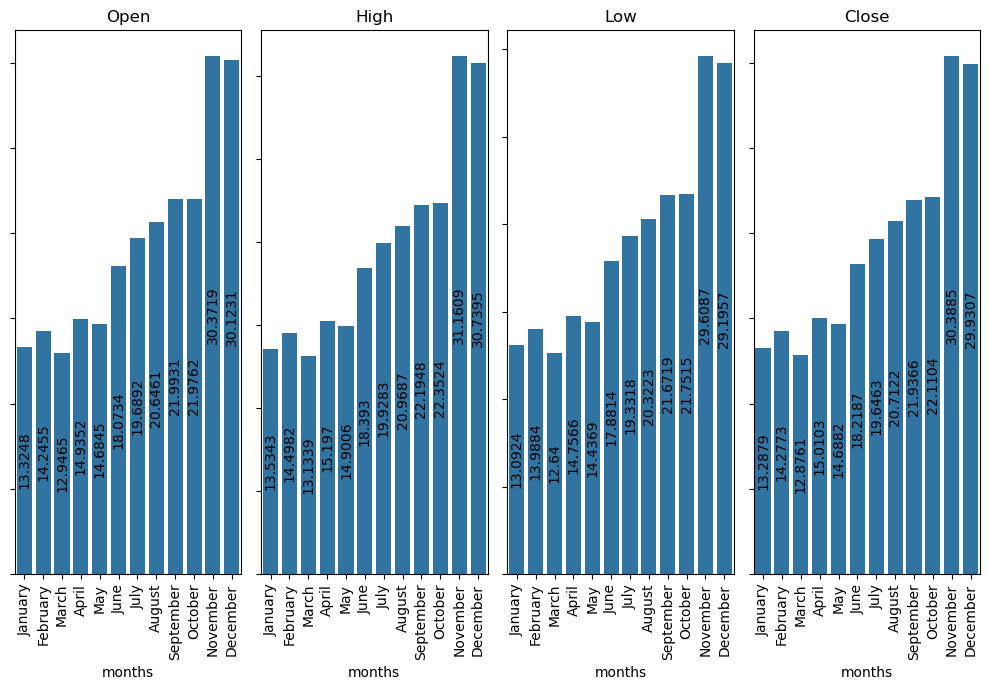

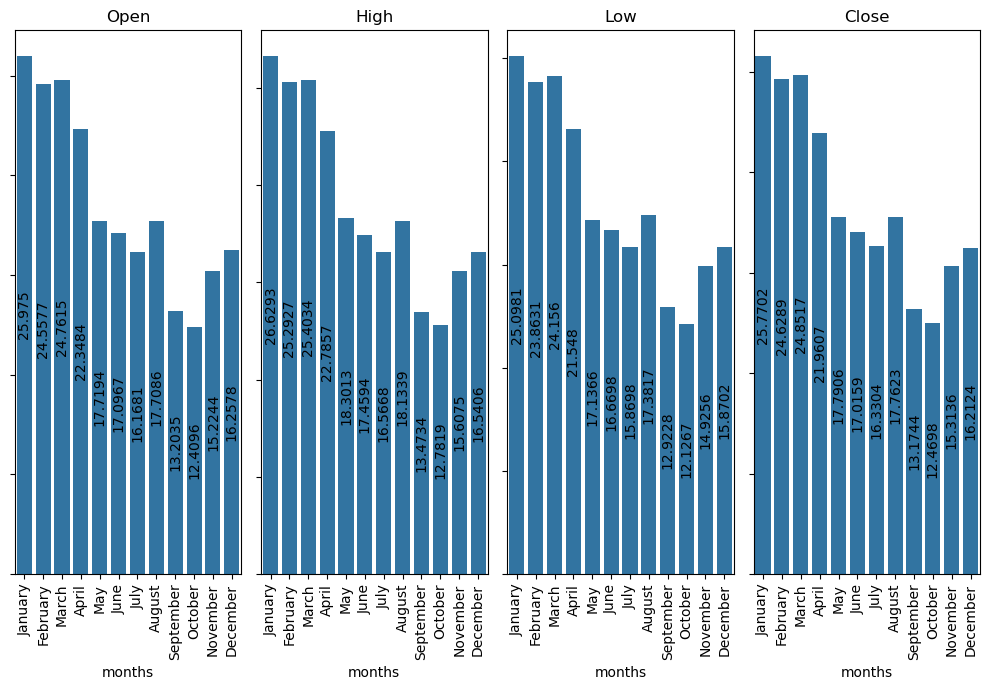

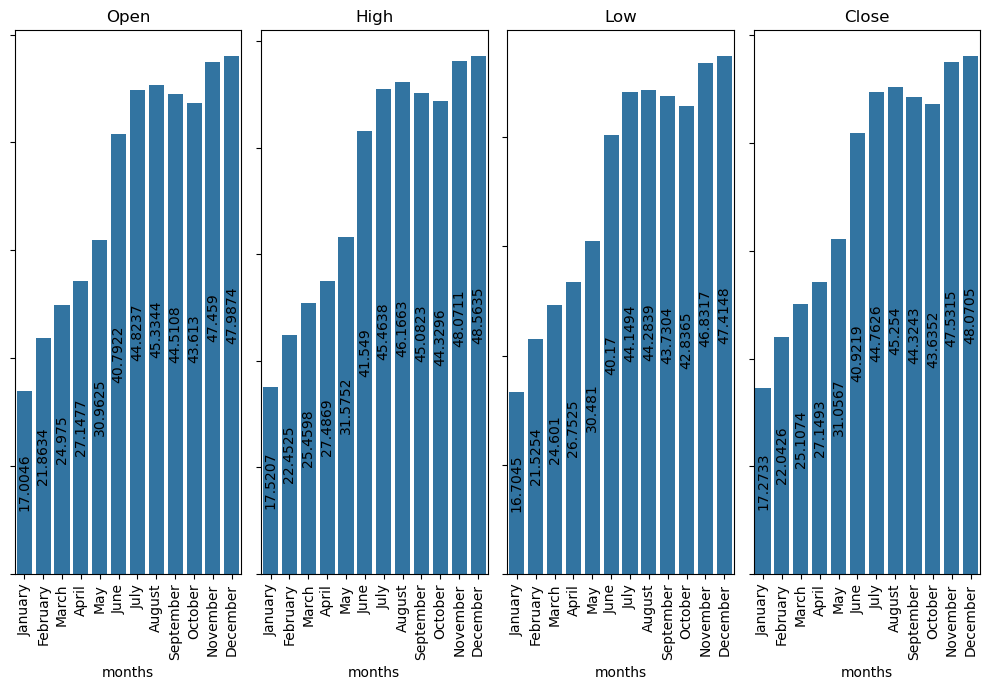

In [6]:
def convert_date(x):
    date = datetime.strptime(x, "%Y-%m-%d")
    return [date.month, date.year]



months = ["January", "February", "March", "April",
         "May", "June", "July", "August",
         "September", "October", "November", "December"]

df["Year"] = df["Date"].apply(lambda x: convert_date(x)[1])
df["Month"] = df["Date"].apply(lambda x: convert_date(x)[0])

nums = df.columns[1:5].tolist()


years = df["Year"].unique()

for i in sorted(years):
    display(HTML("<h2>Monthly average stock prices for {}</h2>".format(i)))
    temp_df = df[df["Year"] == i]
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 7))
    grouped = temp_df.groupby("Month")
    for k, j in enumerate(nums):
        mean = pd.DataFrame(grouped[j].mean())
        mean = mean.sort_index(ascending=True)
        dd = {"month": [], j: []}
        for l in range(mean.shape[0]):
            dd["month"] += [months[mean.index[l]-1]]
            dd[j] += [mean.iloc[l, 0]]
        dd = pd.DataFrame(dd)
        
        sns.barplot(x=dd.iloc[:, 0].values, y=dd.iloc[:, 1].values, ax=axes[k])
        for container in axes[k].containers:
            axes[k].bar_label(container, label_type="center", rotation=90)
        axes[k].set_xticklabels(axes[k].get_xticklabels(), rotation=90)
        axes[k].set_title(j)
        axes[k].set_ylabel("")
        axes[k].set_xlabel("months")
        axes[k].set_yticklabels(())
        
    plt.tight_layout()
    plt.show()

# Data Preprocessing

In [7]:
data = df[nums].copy()

cols = data.columns

for i in cols:
    dname = "Target "+i
    data[dname] = data[i].shift(-1)
    
data.dropna(inplace=True)

sc = MinMaxScaler()
scaled = sc.fit_transform(data.values)

x = []

backcandles = 1
for j in range(4):
    x.append([])
    for i in range(backcandles, scaled.shape[0]):
        x[j].append(scaled[i-backcandles:i, j])

x = np.moveaxis(x, [0], [2])

x, yi = np.array(x), np.array(scaled[backcandles:, -4:])
y = np.reshape(yi, (len(yi), 4))

split = int(len(x)*0.8)

x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

# Forecasting model architecture and performance evaluation

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_input (InputLayer)         │ (None, 1, 4)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_layer (LSTM)              │ (None, 150)            │        93,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer (Dense)             │ (None, 4)              │           604 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,604 (365.64 KB)

 Trainable params: 93,604 (365.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
227/227 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 2.7293e-04 - val_loss: 1.3965e-05
Epoch 2/15
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3131e-06 - val_loss: 1.6606e-05
Epoch 3/15
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.2164e-06 - val_loss: 1.4298e-05
Epoch 4/15
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5089e-06 - val_loss: 1.3587e-05
Epoch 5/15
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0723e-06 - val_loss: 1.4099e-05
Epoch 6/15
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2302e-06 - val_loss: 1.3169e-05
Epoch 7/15
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.3573e-06 - val_loss: 1.5631e-05
Epoch 8/15
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4750e-06 - val_loss: 1.3586e-05
Epoch 9/15
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2136e-06 - val_loss: 1.3157e-05
Epoch 10/15
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.8446e-06 - val_loss: 1.6099e-05
Epoch 11/15
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - los

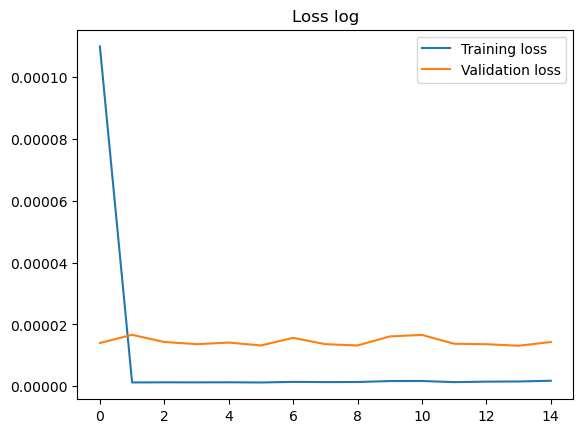

In [8]:
lstm_input = tf.keras.layers.Input(shape=(backcandles, 4), name="lstm_input")
inputs = tf.keras.layers.LSTM(150, name="first_layer")(lstm_input)
inputs = tf.keras.layers.Dense(4, name="dense_layer", activation="linear")(inputs)
model = tf.keras.models.Model(inputs=lstm_input, outputs=inputs)
adam = tf.keras.optimizers.Adam()
model.compile(optimizer=adam, loss="mse")
model.summary()

history = model.fit(x=x_train, y=y_train, batch_size=16, epochs=15, validation_split=0.1)

plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.legend()
plt.title("Loss log")
plt.show()

# Forecasting model test performance evaluation

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
MSE:  0.0007731077164047371
r2:  0.9859632774802878


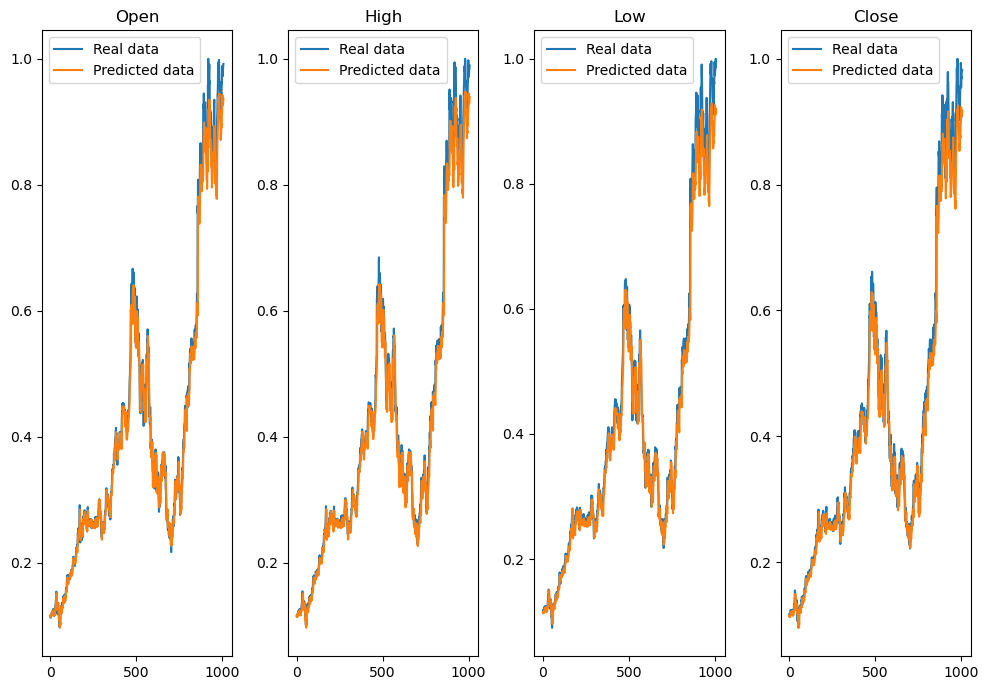

In [9]:
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("r2: ", r2)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 7))
for i in range(4):
    axes[i].plot(y_test[:, i], label="Real data")
    axes[i].plot(y_pred[:, i], label="Predicted data")
    axes[i].legend()
    axes[i].set_title(nums[i])
plt.tight_layout()
plt.show()